# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#SET UP URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + api_key + "&q="

In [4]:
#SET UP LISTS FOR DF
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
        print(f'City not found. Skipping...')
    time.sleep(1)

Beginning Data Retrieval
-----------------------------
Processing Record 1 | chokurdakh
Processing Record 2 | vaini
Processing Record 3 | chuy
Processing Record 4 | rikitea
Processing Record 5 | arraial do cabo
Processing Record 6 | boddam
City not found. Skipping...
Processing Record 7 | barrow
Processing Record 8 | bambous virieux
Processing Record 9 | hermanus
Processing Record 10 | kodiak
City not found. Skipping...
Processing Record 11 | hobart
Processing Record 12 | tasiilaq
Processing Record 13 | chernyshevskiy
Processing Record 14 | grand gaube
Processing Record 15 | ilulissat
Processing Record 16 | saint-philippe
City not found. Skipping...
Processing Record 17 | goundam
Processing Record 18 | nurota
City not found. Skipping...
Processing Record 19 | yellowknife
Processing Record 20 | kaitangata
Processing Record 21 | torbay
Processing Record 22 | thompson
Processing Record 23 | ushuaia
Processing Record 24 | staryy nadym
Processing Record 25 | vila
City not found. Skipping...

Processing Record 226 | aloleng
Processing Record 227 | bilibino
Processing Record 228 | muisne
Processing Record 229 | aksay
City not found. Skipping...
Processing Record 230 | rajapur
Processing Record 231 | gunib
Processing Record 232 | sorong
Processing Record 233 | khakurinokhabl
Processing Record 234 | tual
Processing Record 235 | san ramon
Processing Record 236 | maniitsoq
Processing Record 237 | hualmay
Processing Record 238 | vijapur
Processing Record 239 | santiago del estero
Processing Record 240 | sarangani
Processing Record 241 | asmara
Processing Record 242 | pemba
Processing Record 243 | canon city
Processing Record 244 | yerbogachen
Processing Record 245 | dalby
Processing Record 246 | marsh harbour
Processing Record 247 | kjopsvik
Processing Record 248 | homer
Processing Record 249 | puerto leguizamo
Processing Record 250 | barranca
Processing Record 251 | ponta do sol
Processing Record 252 | ternate
Processing Record 253 | ponta delgada
Processing Record 254 | airai
P

Processing Record 453 | portland
Processing Record 454 | flin flon
Processing Record 455 | dubbo
Processing Record 456 | adrar
Processing Record 457 | ntcheu
City not found. Skipping...
Processing Record 458 | tazovskiy
Processing Record 459 | paamiut
Processing Record 460 | tallahassee
Processing Record 461 | idrinskoye
Processing Record 462 | elat
Processing Record 463 | san jeronimo
Processing Record 464 | katherine
Processing Record 465 | kankaanpaa
Processing Record 466 | enshi
Processing Record 467 | olinda
Processing Record 468 | neustadt
Processing Record 469 | okhotsk
Processing Record 470 | changzhou
City not found. Skipping...
Processing Record 471 | fare
Processing Record 472 | aklavik
Processing Record 473 | ayna
Processing Record 474 | imbituba
Processing Record 475 | egvekinot
Processing Record 476 | giddalur
Processing Record 477 | toplet
Processing Record 478 | baoshan
Processing Record 479 | noumea
City not found. Skipping...
Processing Record 480 | piacabucu
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame({"City": city_name,
                         "Cloudiness": cloudiness,
                         "Country": country, 
                         "Date": date,
                         "Humidity": humidity,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Wind Speed": wind_speed})

city_data.to_csv("city_data.csv")

city_data.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [6]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Chokurdakh,78,RU,1570515485,96,70.62,147.90,12.43,1.88
1,Vaini,40,IN,1570515487,62,15.34,74.49,84.20,5.82
2,Chuy,1,UY,1570515488,79,-33.69,-53.46,55.59,8.12
3,Rikitea,100,PF,1570515489,78,-23.12,-134.97,70.05,11.48
4,Arraial do Cabo,93,BR,1570515309,94,-22.97,-42.02,71.52,2.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

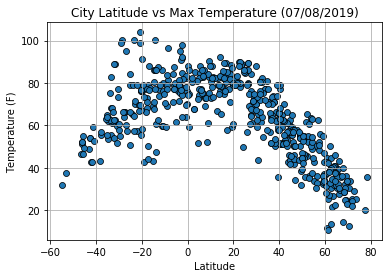

In [7]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Max Temperature (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

plt.savefig("LatitudeTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

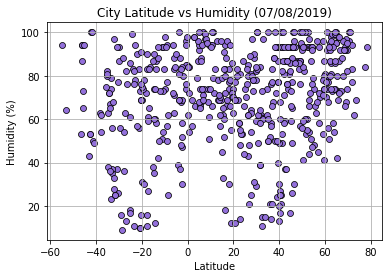

In [8]:
plt.scatter(city_data["Lat"], city_data["Humidity"], edgecolor="black", linewidth = .75, color="mediumpurple")
plt.title("City Latitude vs Humidity (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("LatitudeHumidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

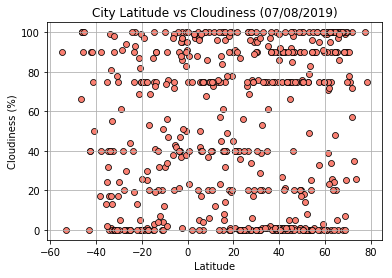

In [9]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], edgecolor="black", linewidth = .75, color="salmon")
plt.title("City Latitude vs Cloudiness (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("LatitudeCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

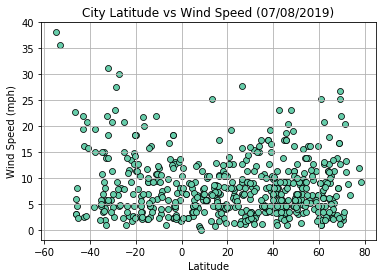

In [10]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], edgecolor="black", linewidth = .75, color="mediumaquamarine")
plt.title("City Latitude vs Wind Speed (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("LatitudeWind.png")
plt.show()


In [11]:
# Observations¶
#1.)Latitude appears to correlate with temperature: the closer a city is to the equator, the higher the temperature. As you move away from the equator - either north or south - the temperature decreases.
#2.)Latitude does not appear to affect the percentage of cloudiness. Throughout the specturm of latitude, some cities are at 100% cloudiness while others are at 0%.
#3.)The majority of cities have wind speeds below 20mph but the wind speed does not appear to increase or decrease as one moves north or south in latitude.
#4.)There are two outliers with exceptionally high humidity (Puerto Maldonado, Peru and Paita, Peru) but aside from those, all other humidity is 100% or less. Humidity is highest at far northern and southern latitudes as well as near the equator (generally between 50% and 100%) and lower around 20 degrees south and 20-40 degrees north.